In [ ]:
import pandas as pd

dfproduct3 = pd.read_csv(
    r"C:\Users\pc\Desktop\AIbazaar\AIBazaar\AI\utils\newProduct.csv"
)
df = pd.read_csv(
    r"C:\Users\pc\Desktop\AIbazaar\AIBazaar\AI\utils\products_descriptions.csv"
)
df["ProductName"] = dfproduct3["Product Name"].str.strip()

df.to_csv("filterPhone2.csv", index=False)
print(f"Original rows: {len(df)}")

In [4]:
import pandas as pd

# Giriş ve çıkış dosyası
input_file = "products.csv"
output_file = "product_specs_en.csv"

# Türkçe -> İngilizce kolon çeviri sözlüğü
column_mapping = {
    "Ekran Boyutu": "Display Size",
    "Ekran Teknolojisi": "Display Technology",
    "Piksel Yoğunluğu": "Pixel Density",
    "Batarya Kapasitesi": "Battery Capacity",
    "Kamera Çözünürlüğü": "Camera Resolution",
    "CPU Üretim Teknolojisi": "CPU Manufacturing",
    "İşletim Sistemi": "Operating System",
    "RAM Kapasitesi": "RAM",
    "Dahili Hafıza": "Internal Storage",
    "Hızlı Şarj Desteği": "Fast Charging",
    "Ekran Yenileme Hızı": "Refresh Rate",
    "Model": "Model",
    "5G" : "5G",
    "Price" : "Price"
}

# CSV dosyasını oku
df = pd.read_csv(r"C:\Users\EXCALIBUR\Desktop\projects\Okul Ödevler\AIBazaar\AI\utils\notebooks\Product.csv")

# Her satırı ayrıştır
expanded_rows = []
for _, row in df.iterrows():
    description_parts = row["Description"].split(";")
    specs = {}
    for part in description_parts:
        if ":" in part:
            key, value = part.split(":", 1)
            key = key.strip()
            value = value.strip()
            english_key = column_mapping.get(key, key)  # eşleşmeyeni orijinal bırak
            specs[english_key] = value
    expanded_rows.append(specs)

# Yeni DataFrame oluştur
expanded_df = pd.DataFrame(expanded_rows)

# CSV olarak kaydet
expanded_df.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"{output_file} dosyası İngilizce kolon isimleriyle başarıyla oluşturuldu.")


product_specs_en.csv dosyası İngilizce kolon isimleriyle başarıyla oluşturuldu.


In [ ]:
%pip install statsmodels
import pandas as pd
import statsmodels.api as sm

# Örnek veri oluşturuyoruz
data = {
    'ram': [4, 6, 8, 4, 6, 8, 6, 4, 8, 6, 4, 6],
    'battery': [3000, 3500, 4000, 2800, 3300, 4200, 3100, 2900, 4100, 3400, 3200, 3600],
    'storage': [64, 128, 256, 64, 128, 256, 128, 64, 256, 128, 64, 128],
    'os': ['Android', 'Android', 'Android', 'iOS', 'iOS', 'iOS', 'Android', 'iOS', 'Android', 'iOS', 'Android', 'Android'],
    'brand': ['Samsung', 'Samsung', 'Samsung', 'Apple', 'Apple', 'Apple', 'Samsung', 'Apple', 'Samsung', 'Apple', 'Samsung', 'Samsung'],
    'fiyat': [12000, 15000, 18000, 25000, 28000, 30000, 16000, 27000, 19000, 29000, 14000, 15500]
}

df = pd.DataFrame(data)

# Bağımsız değişkenler
X = df.drop(columns=['fiyat'])

# Kategorik değişkenleri one-hot encode et (ilk kategoriyi düşerek)
X_encoded = pd.get_dummies(X, drop_first=True)

# Sabit terim ekle
X_encoded = sm.add_constant(X_encoded)

# Hedef değişken
y = df['fiyat']

# Modeli oluştur
model = sm.OLS(y, X_encoded).fit()

# Sonuçları yazdır
print(model.summary())


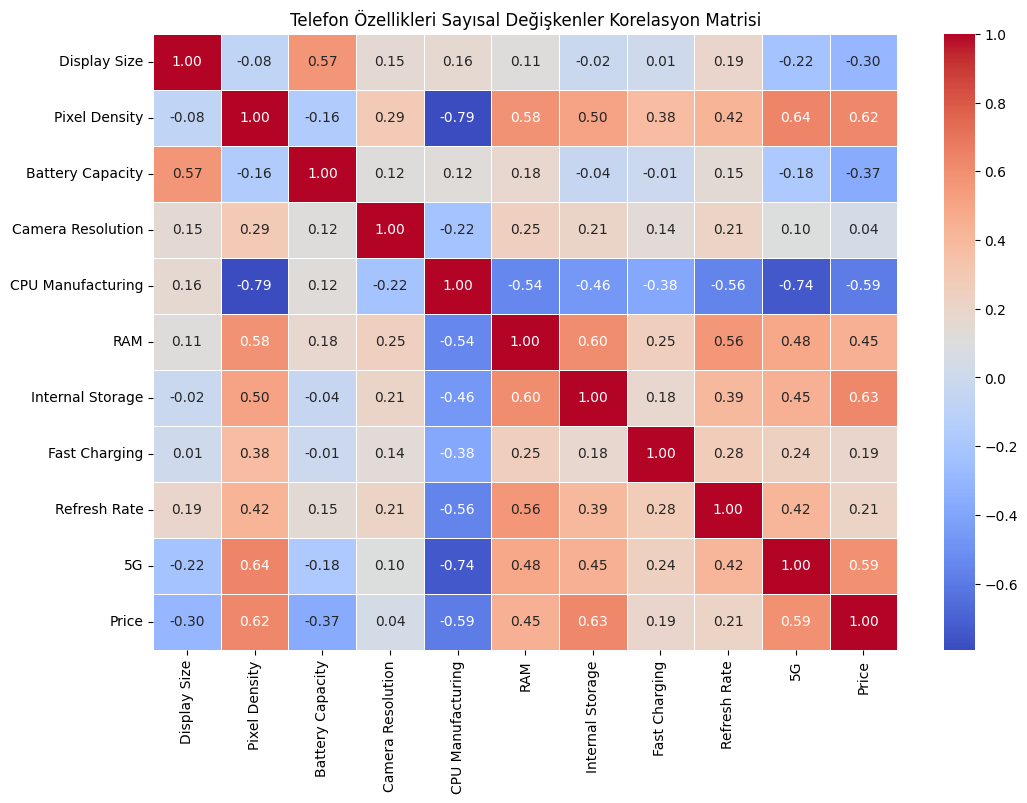

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV dosyasını oku
df = pd.read_csv(r"C:\Users\EXCALIBUR\Desktop\projects\Okul Ödevler\AIBazaar\AI\utils\notebooks\Product.csv")

# Sadece sayısal sütunları seç
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisini hesapla
corr = numeric_df.corr()

# Korelasyon ısı haritası çizimi
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Telefon Özellikleri Sayısal Değişkenler Korelasyon Matrisi")
plt.show()


In [18]:
import pandas as pd

df = pd.read_csv(r"C:\Users\EXCALIBUR\Desktop\projects\Okul Ödevler\AIBazaar\AI\utils\notebooks\XGBoostData.csv") 

df["ProductName"] = df["Description"].str.extract(r'Model:\s*([^;]+)')

df["Description"] = df["Description"].str.replace(r'Model:\s*[^;]+;\s*', '', regex=True)

df.to_csv("newProductData.csv", index=False,encoding="utf-8-sig")

print(df.head())


   ProductID                                        Description  \
0     966543  Ekran Boyutu: 6.73 İnç; Ekran Teknolojisi: AMO...   
1     968786  Ekran Boyutu: 6.8 İnç; Ekran Teknolojisi: OLED...   
2     960937  Ekran Boyutu: 6.78 İnç; Ekran Teknolojisi: AMO...   
3     960862  Ekran Boyutu: 6.9 İnç; Ekran Teknolojisi: OLED...   
4     997423  Ekran Boyutu: 6.36 İnç; Ekran Teknolojisi: AMO...   

                                            ImageUrl              ProductName  
0  https://resim.epey.com/966543/b_xiaomi-15-ultr...          Xiaomi 15 Ultra  
1  https://resim.epey.com/968786/b_honor-magic7-p...         Honor Magic7 Pro  
2  https://resim.epey.com/960937/b_vivo-x200-pro-...            Vivo X200 Pro  
3  https://resim.epey.com/960862/b_apple-iphone-1...  Apple iPhone 16 Pro Max  
4  https://resim.epey.com/997423/b_xiaomi-15-512g...                Xiaomi 15  
